# 20180726 Thursday

Actions
- import programs
- open & read in csv file, assign header row
- drop 1st row
- add columns with calcs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read my ILINet.csv file into a dataframe using pandas
# Explicitly pass header=<row index number> to be able to replace existing names
ILIcsvDF = pd.read_csv('../../Data/CDCvirusILI/FluViewPhase2Data/ILINet.csv', header=1)
# show first few entries
ILIcsvDF.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


In [5]:
# List column headers
list(ILIcsvDF)

['REGION TYPE',
 'REGION',
 'YEAR',
 'WEEK',
 '% WEIGHTED ILI',
 '%UNWEIGHTED ILI',
 'AGE 0-4',
 'AGE 25-49',
 'AGE 25-64',
 'AGE 5-24',
 'AGE 50-64',
 'AGE 65',
 'ILITOTAL',
 'NUM. OF PROVIDERS',
 'TOTAL PATIENTS']

In [6]:
# delete the line at the top of the file that says 
# "PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS"
ILIcsvDF.drop(index=0)
# without the cmd below
# the 1st and last 30 rows print below
ILIcsvDF.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


What are the numbers in the left column: keys, IDs, types, names, axes? They are not indecies!
- They are probably index locations .iloc! 

In [7]:
# List the data types for each column
ILIcsvDF.dtypes

REGION TYPE           object
REGION                object
YEAR                   int64
WEEK                   int64
% WEIGHTED ILI       float64
%UNWEIGHTED ILI      float64
AGE 0-4                int64
AGE 25-49             object
AGE 25-64             object
AGE 5-24               int64
AGE 50-64             object
AGE 65                 int64
ILITOTAL               int64
NUM. OF PROVIDERS      int64
TOTAL PATIENTS         int64
dtype: object

Note that YEAR & WEEK are integers :)

In [8]:
# Divide week by 53 to determine PortionOfYear
ILIcsvDF["PortionOfYear"] = ILIcsvDF["WEEK"] / 53
ILIcsvDF.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PortionOfYear
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842,0.754717
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023,0.773585
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961,0.792453
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044,0.811321
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506,0.830189


In [9]:
# create a new column "YearWPortion" 
# add "YEAR" + "YearWPortion"
ILIcsvDF["YearWPortion"] = ILIcsvDF["YEAR"] + ILIcsvDF["PortionOfYear"]
ILIcsvDF.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PortionOfYear,YearWPortion
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842,0.754717,1997.754717
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023,0.773585,1997.773585
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961,0.792453,1997.792453
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044,0.811321,1997.811321
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506,0.830189,1997.830189


Next Action
- export new file

In [10]:
# export elements from dataframe into a new csv
# use the instance method to_csv
# filepath is the only required argument
# for more arguments 
# see section 24.1.26.1 of pandas doc, pg 1206
ILIcsvDF.to_csv('../../Data/CDCvirusILI/FluViewPhase2Data/ILINet20180726.csv')

This ^ worked :)

Next Action
- graph x-axis = "YearWPortion", y-axis = "%UNWEIGHTED ILI"
- do I need to take the space out of the column header? 

## How to make a graph

Types of Plots in matplotlib
- matplotlib Gallery
    - https://matplotlib.org/gallery.html
        - a simple line graph (using sin) https://matplotlib.org/examples/lines_bars_and_markers/line_demo_dash_control.html
        - example code for lines: solid, dashed, dotted, etc
            - https://matplotlib.org/examples/lines_bars_and_markers/linestyles.html
            - https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html
        
- matplotlib.pyplot module summary
    - https://matplotlib.org/api/pyplot_summary.html
    - contains functions that allow you to generate many kinds of plots quickly
    - While it is easy to quickly generate plots with the matplotlib.pyplot module, we recommend using the object-oriented approach for more control and customization of your plots.
    - includes section on colors
- matplotlib.pyplot Functions 
    - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
    - matplotlib.pyplot provides a MATLAB-like way of plotting
- matplotlib.pyplot gallery
    - https://matplotlib.org/gallery/index.html#pyplots-examples
- matplotlib.pyplot tutorial
    - https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py



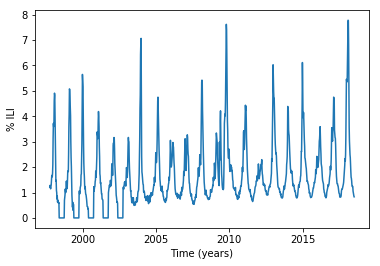

In [11]:
# assign "YearWPortion" to x-values
x = ILIcsvDF['YearWPortion']
# assign "%UNWEIGHTED ILI" to y-values
y = ILIcsvDF['%UNWEIGHTED ILI']

# label the axes
plt.xlabel('Time (years)')
plt.ylabel('% ILI')

# sets the min and max of the axes [xmin, xmax, ymin, ymax]
# plt.axis([1997, 2019, 0, 100])

# plots x versus y
plt.plot(x,y)

# do I need to show - no!
# plt.show()

Next Action
- explicitly define the axes limits

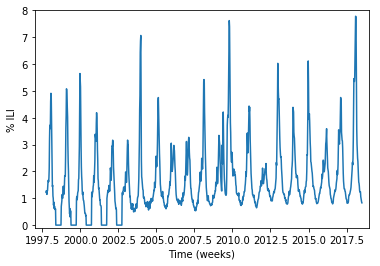

In [12]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# plots x versus y
plt.plot(x,y)

Next Action
- Add more years to the x-axis

Questions: 
what is a subplot()

Python’s range() Function Explained
- https://www.pythoncentral.io/pythons-range-function-explained/ 

In [13]:
# generate a list of years from 1997 to 2019
for xAxisTicks in range(1997, 2020, 1):
    print(xAxisTicks)

1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


Python 3 turn range to a list
- https://stackoverflow.com/questions/11480042/python-3-turn-range-to-a-list

In [14]:
# generate a list of years from 1997 to 2019
xAxisTicks = list(range(1997, 2020, 1))
print(xAxisTicks)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


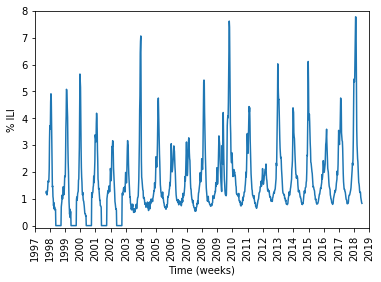

In [15]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(range(1997, 2020, 1))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, xAxisTicks, rotation=90)

# plots x versus y
plt.plot(x,y)

Questions
- xticks(locs, [labels], \**kwargs)
    - do I need [] around xAxisTicks? 
        - no
    - or is it indicating that a list should go there?
        - yes
- do I need to make sure locs are integers?
- do I need to make sure [labels] are strings?

Next Action
- what is a subplot?
    - subplot is a function that allows you to graph 2 or more plots in one figure
    - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
- plot 2017 - 2019
    - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html
- 

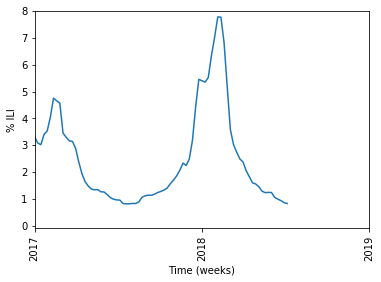

In [16]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(range(2017, 2020, 1))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, xAxisTicks, rotation=90)

# Plot only 2017 - 2019
plt.xlim(2017, 2019)

# plots x versus y
plt.plot(x,y)

Next Action
- show more axes ticks

TypeError: 'float' object cannot be interpreted as an integer

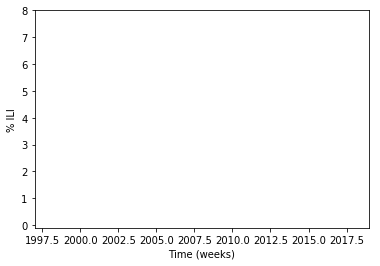

In [17]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(range(2017, 2020, 0.15))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, xAxisTicks, rotation=90)

# Plot only 2017 - 2019
plt.xlim(2017, 2019)

# plots x versus y
plt.plot(x,y)

Next Actions
- Find examples of blogs with links to Jupyter Notebooks
    - choose a blog host
- Figure out how to embed Jupyter Notebooks in my blog
- Do I need to put my jupyter notebooks on github so I can link to them from my blog?

Write in my blog
I have decided to switch career paths from molecular virology to become a bioinformatician (wish me luck :) At first I thought learning R would be the best way to start, this is because I was at Johns Hopkins and mostly asking biostatisticians. When I moved to SF, the people I asked said I should learn Python. These pepople were mostly computer engineer and data scientists. I have chosen to start with Python since there are a lot of good support groups in the SF bay area, including PyLadies and SF Python (check out their MeetUps, one which I now host!). 
I am motivated by end goals, not processes. Naturally, I am a perfectionist, but I am fighting against this tendency. My first goal is to be able to add something useful to nextstrain.org.  

In [ ]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(range(2017, 2020, 0.15))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, float(xAxisTicks), rotation=90)

# Plot only 2017 - 2019
plt.xlim(2017, 2019)

# plots x versus y
plt.plot(x,y)

github landing page that converts repository to a landing page, blog: "github pages" or wordpress

In [ ]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(np.arange(2017, 2018.6, 0.05))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, xAxisTicks, rotation=90)

# Plot only 2017 - 2019
plt.xlim(2017.5, 2018.5)

# plots x versus y
plt.plot(x,y)

In [ ]:
# assign x and y values
x = ILIcsvDF['YearWPortion']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(np.arange(2017, 2018.6, 0.03))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, xAxisTicks, rotation=90)

# Plot only 2017 - 2019
plt.xlim(2017.7, 2018.3)

# plots x versus y
plt.plot(x,y)

Next Actions
- Make graph with year-week x-axis lables
    - create a column in the dataframe that has "YEAR"-"WEEK" (Concat with "-")
    - sort by the values in the YEAR-WEEK column
    - make a bar/column graph, rather than an x,y graph, but still draw a line (if possible) 
    - graph all years (notice that there is no longer a gap for week 53 in the earlier years
    - zoom into x-axis coordinates 2017-37 to 2017-10
        - I worked these week numbers out by divding the decimal by (1/53 = 0.01887)
        - The peak was during week 5-6, the first week of February 
- make a dataframe that allows conversion from NIH weeks to calendar days (use Sunday-Saturday as 1 week. When does week 1 start? - email the NIH to ask)
    - ask NIH "How do I convert from week to the first day of the week?"
    - list all the days in every year
    - use a looping function to label 7 consecutive days with a week number
        - week += 1
    - somehow output the 1st (and separately the last) day within a week
    - the output should be a dictionary with week number as the key and date as the value
        - or should it be date as the key and week number as the value
    - in the end I want to be able to write "Isolates from the first day of week X through the last day of week Y were downloaded."

In [ ]:
# I need to create a column in my df with the x header ...
# assign x and y values
x = ILIcsvDF['YEAR-WEEK']
y = ILIcsvDF['%UNWEIGHTED ILI']

# label axes
plt.xlabel('Time (weeks)')
plt.ylabel('% ILI')

# set the min and max of the axes 
# [xmin, xmax, ymin, ymax]
plt.axis([1997, 2019, -.1, 8])

# generate a list of years from 1997 to 2019
xAxisTicks = list(np.arange(2017, 2018.6, 0.05))

# Set tick locations and labels on axes
plt.xticks(xAxisTicks, xAxisTicks, rotation=90)

# Plot only 2017 - 2019
plt.xlim(2017.7, 2018.2)

# plots x versus y
plt.plot(x,y)

In [ ]:
ILIcsvDF.dtypes

Next Actions
- concatenate year-week
- Make a bar graph

In [ ]:
# Many ways to concatenate
'{0}{1}'.format('a', 'b')
''.join([a, b]) 
''.append(a)
# f-string
f'<text> {<expression> <optional !s, !r, or !a> <optional : format specifier>} <text>
+
+= 

In [ ]:
ILIcsvDF["YearWeek3"] = str(ILIcsvDF["YEAR"])+'-'+ILIcsvDF["WEEK"].style.format('{:02d}')
# d means 

In [ ]:
ILIcsvDF["YearWeek2"] = '{0}{1}'.format(ILIcsvDF["YEAR"], '\-', ILIcsvDF["WEEK"])
ILIcsvDF.head()

In [ ]:
ILIcsvDF["YearWeek1"] = '{0}{1}'.format(ILIcsvDF["YEAR"], '\-', ILIcsvDF["WEEK"])
ILIcsvDF.head()

In [ ]:
# create a new column "YearWeek1" 
# concatenate "YEAR" "-" "WEEK"
ILIcsvDF["YearWeek1"] = ILIcsvDF["YEAR"].join(ILIcsvDF["WEEK"])


Zero prefix so that I don't have 9
- building strings 

In [ ]:
pd.ILIcsvDF['YEAR'].astype('str')

In [ ]:
df['A'].apply(lambda x: '{:02d}'.format(x))

In [ ]:
pd.concat(str(df['B']))

In [ ]:
df['B'].astype('str') + '-' + df['A'].apply(lambda x: '{:02d}'.format(x))

In [ ]:
df['C'] = df['B'].astype('str') + '-' + df['A'].apply(lambda x: '{:02d}'.format(x))

In [18]:
ILIcsvDF['YearWeek4'] = ILIcsvDF['YEAR'].astype('str') + '-' + ILIcsvDF['WEEK'].apply(lambda x: '{:02d}'.format(x))
ILIcsvDF.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PortionOfYear,YearWPortion,YearWeek4
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842,0.754717,1997.754717,1997-40
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023,0.773585,1997.773585,1997-41
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961,0.792453,1997.792453,1997-42
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044,0.811321,1997.811321,1997-43
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506,0.830189,1997.830189,1997-44


<BarContainer object of 1084 artists>

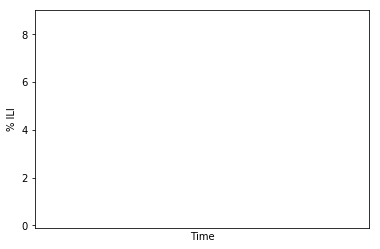

In [20]:
# assign "YearWPortion" to x-values
x = ILIcsvDF['YearWeek4']
# assign "%UNWEIGHTED ILI" to y-values
y = ILIcsvDF['%UNWEIGHTED ILI']

# label the axes
plt.xlabel('Time')
plt.ylabel('% ILI')

# sets the min and max of the axes [xmin, xmax, ymin, ymax]
plt.axis([1997, 2002, -.1, 9])

# plots x versus y
plt.bar(x, y)

In [21]:
ILIcsvDF.info()

<bound method DataFrame.info of      REGION TYPE REGION  YEAR  WEEK  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  \
0       National      X  1997    40        1.101480         1.216860      179   
1       National      X  1997    41        1.200070         1.280640      199   
2       National      X  1997    42        1.378760         1.239060      228   
3       National      X  1997    43        1.199200         1.144730      188   
4       National      X  1997    44        1.656180         1.261120      217   
5       National      X  1997    45        1.413260         1.282750      178   
6       National      X  1997    46        1.986800         1.445790      294   
7       National      X  1997    47        2.447490         1.647960      288   
8       National      X  1997    48        1.739010         1.675170      268   
9       National      X  1997    49        1.939190         1.617390      299   
10      National      X  1997    50        2.281660         1.766320      346

In [27]:
ILIcsvDF1997 = ILIcsvDF.loc[ILIcsvDF['YEAR']==1997]
ILIcsvDF1997

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,PortionOfYear,YearWPortion,YearWeek4
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842,0.754717,1997.754717,1997-40
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023,0.773585,1997.773585,1997-41
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961,0.792453,1997.792453,1997-42
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044,0.811321,1997.811321,1997-43
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506,0.830189,1997.830189,1997-44
5,National,X,1997,45,1.41326,1.28275,178,X,148,281,X,48,655,195,51062,0.849057,1997.849057,1997-45
6,National,X,1997,46,1.98680,1.44579,294,X,240,328,X,70,932,248,64463,0.867925,1997.867925,1997-46
7,National,X,1997,47,2.44749,1.64796,288,X,293,456,X,63,1100,256,66749,0.886792,1997.886792,1997-47
8,National,X,1997,48,1.73901,1.67517,268,X,206,343,X,69,886,252,52890,0.905660,1997.905660,1997-48
9,National,X,1997,49,1.93919,1.61739,299,X,282,415,X,102,1098,253,67887,0.924528,1997.924528,1997-49


In [ ]:
# create a dataframe
df = pd.dataframe[{0, 1, 2, 3, 4, 5}]

<BarContainer object of 14 artists>

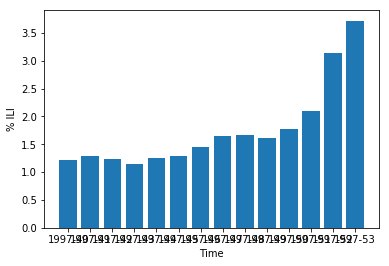

In [28]:
# assign "YearWPortion" to x-values
x = ILIcsvDF1997['YearWeek4']
# assign "%UNWEIGHTED ILI" to y-values
y = ILIcsvDF1997['%UNWEIGHTED ILI']

# label the axes
plt.xlabel('Time')
plt.ylabel('% ILI')

# sets the min and max of the axes [xmin, xmax, ymin, ymax]
# plt.axis([1997, 2002, -.1, 9])

# plots 
plt.bar(x, y)



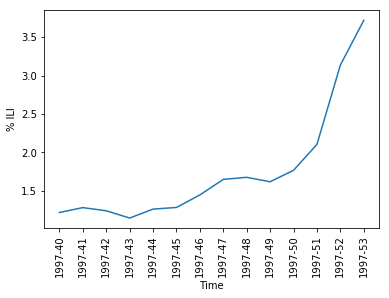

In [31]:
# assign "YearWPortion" to x-values
x = ILIcsvDF1997['YearWeek4']
# assign "%UNWEIGHTED ILI" to y-values
y = ILIcsvDF1997['%UNWEIGHTED ILI']

# label the axes
plt.xlabel('Time')
plt.ylabel('% ILI')

# sets the min and max of the axes [xmin, xmax, ymin, ymax]
# plt.axis([1997, 2002, -.1, 9])

plt.xticks(rotation='vertical')

# plots 
plt.plot(x, y)



#### Google
- "pd add a zero prefix to a series of integers"
- "plt format xticks float"
- Andrea's suggestion to skip the question, don't read it because it is bad code

#### Found
- https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-lables
    - from matplotlib.ticker import FormatStrFormatter
    - fig, ax = plt.subplots()
    - ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
- https://stackoverflow.com/questions/42929550/ticks-format-of-an-axis-in-matplotlib/42929894
    - import matplotlib.ticker as mtick
    - plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
#### Google
- "create a list of floats python 3"
#### Found
- https://stackoverflow.com/questions/41120646/python-3-how-to-create-list-out-of-float-numbers
    - result=[]
    - for value in response_i['objcontent'][0]['rowvalues']:
        - lat = value[0]
        - print(lat)
        - result.append(float(lat))

    - print (result)
#### Google
- "numpy range to make a list of floats"
#### Found
- https://stackoverflow.com/questions/7267226/range-for-floats
- lots of answers
    - import decimal
    - list(frange(0, 100, decimal.Decimal('0.1')))[-1]
    - output: Decimal('99.9')
    - or
    - import decimal

    - def drange(x, y, jump):
        - while x < y:
        - yield float(x)
        - x += decimal.Decimal(jump)
- and then
    - list(drange(0, 100, '0.1'))[-1]
    - output: 99.9
- or 
    - [x / 10.0 for x in range(5, 50, 15)]
- or 
    - map(lambda x: x/10.0, range(5, 50, 15))


Other things that I googled
- "plt. bar plot"
- "python 3 concatenate strings"
Found
- https://www.pythonforbeginners.com/concatenation/string-concatenation-and-formatting-in-python
    - String Concatenation and Formatting
        - Concatenation, Formatting in Python, Formatting with the % Operator, Formatting with the { } Operators, Using the Join Method
- https://softwareengineering.stackexchange.com/questions/304445/why-is-s-better-than-for-concatenation
    - Why is %s better than + for concatenation?
        - readability & performance
- https://www.python.org/dev/peps/pep-0498/
    - PEP 498 -- Literal String Interpolation
- http://blog.lerner.co.il/speedy-string-concatenation-python/
def concat1(): 
    z = x + y 
    return z 

 def concat2(): 
    z = "%s%s" % (x, y) 
    return z 

def concat3(): 
    z = "{}{}".format(x, y) 
    return z 

def concat4(): 
    z = "{0}{1}".format(x, y) 
    return z

concat1: 153ns/loop
concat2: 275ns/loop
concat3: 398ns/loop
concat4: 393ns/loop





#### Yaqi Shi, the Clover host recommended 

- read the summary of SciKit Learn

- http://scikit-learn.org/stable/
- http://scikit-learn.org/stable/documentation.html
- http://scikit-learn.org/stable/tutorial/basic/tutorial.html
- http://scikit-learn.org/stable/tutorial/index.html
- http://scikit-learn.org/stable/user_guide.html



## Blogging

The question is Medium, Wordpress or Git Pages?

- https://firstsiteguide.com/tools/blogging/
- http://www.aroyaldaughter.com/2013/01/04/blogger-vs-wordpress-content-ownership/
- https://webhostinggeeks.com/blog/best-10-blogging-platforms/
- http://www.dearblogger.org/blogger-or-wordpress-better
    - Discover The Best Place to Start a Blog (and Host a Blog) – 2018